<a href="https://colab.research.google.com/github/giaranjan/morse/blob/main/MORSE_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MORSE PART 2 - PICTURE INPUT AND CONVERTED TO TEXT - WHICH IS THEN CONVERTED TO TEXT/ AUDIO OUTPUT

Some Resources:

My own Github

https://nanonets.com/blog/deep-learning-ocr/

https://medium.com/artificialis/how-to-extract-text-from-any-image-with-deep-learning-e834d5a9863e

https://medium.com/artificialis/hydra-ai-accurately-extract-text-from-any-image-6dfc8abd710a

https://www.analyticsvidhya.com/blog/2022/09/extract-text-from-images-quickly-using-keras-ocr-pipeline/

https://www.hackersrealm.net/post/image-to-text-conversion-extraction-using-python

https://towardsdatascience.com/image-to-text-ocr-with-tesseract-js-3540b420e0e7

https://towardsdatascience.com/extract-text-from-image-using-python-8e8cfbbce743

https://neptune.ai/blog/15-computer-visions-projects

https://www.youtube.com/watch?v=ZVKaWPW9oQY



In [ ]:
# Organise this better
# Give an option to choose which model they want after the comaprison by clicking on the options (or maybe input name)
# take the extracted text as text input for the morse
# inetgrate into the morse logic

Method 1: pytesseract

In [ ]:
# Step 1: Install Libraries 📚

!apt install tesseract-ocr
!pip install pytesseract
!pip install pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
# Step 2: Import Libraries 📝

from PIL import Image
import pytesseract
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
# Step 3: Upload Image 🖼️

uploaded = files.upload()
image_file_name = list(uploaded.keys())[0]

# maybe change this to ipywidgets or something that can work beyond colab - and also where i can drag and drop images
# also maybe plot the image after uploading

Saving Screenshot 2023-09-06 at 10.47.17.png to Screenshot 2023-09-06 at 10.47.17 (3).png


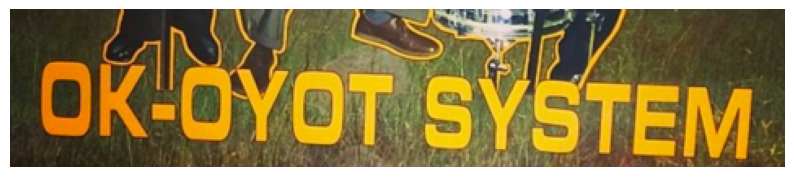

In [ ]:
# Step 4: Display Uploaded Image 🖼️👀

fig, ax = plt.subplots(figsize=(10, 10))
image_path = f"/content/{image_file_name}"  # Adjust this path if needed
ax.imshow(plt.imread(image_path))
ax.axis('off')
plt.show()

In [ ]:
# Step 5: Create OCR Function 🖥️📖

def ocr_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text.upper()

In [ ]:
# Step 6: Extract and Display Text 🖥️📖

extracted_text = ocr_from_image(image_file_name)
print(f"Extracted Text: {extracted_text}")

Extracted Text:  



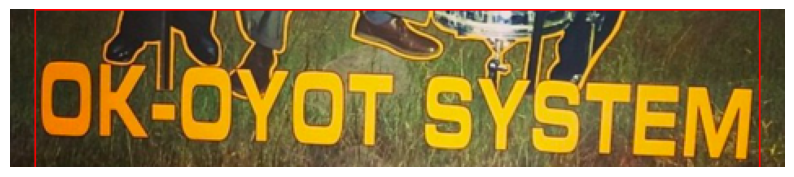

In [ ]:
# Step 7: Display Image with Annotations 🖼️🔍

from PIL import ImageDraw

# Get bounding box coordinates from pytesseract
image = Image.open(image_file_name)
bounding_boxes = pytesseract.image_to_boxes(image)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for box in bounding_boxes.splitlines():
    b = box.split()
    draw.rectangle([(int(b[1]), int(image.size[1] - int(b[2]))), (int(b[3]), int(image.size[1] - int(b[4])))], outline="red")

# Display the image with annotations
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)
ax.axis('off')
plt.show()

Method 2: easyocr

In [ ]:
!pip install easyocr

In [ ]:
import easyocr

reader = easyocr.Reader(['en'], gpu=True)  # English language, using GPU

def ocr_with_easyocr(image_path):
    results = reader.readtext(image_path)
    extracted_text = " ".join([result[1] for result in results])
    return extracted_text.upper(), results

In [ ]:
# Call this function to get the text using EasyOCR
easyocr_text, results = ocr_with_easyocr(image_file_name)
print(f"Text extracted using EasyOCR: {easyocr_text}")

Text extracted using EasyOCR: OK"OYOT SYSTEM


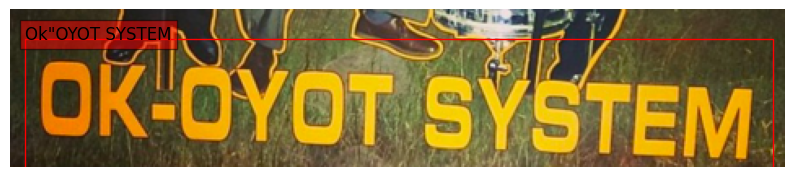

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(image_file_name))

for result in results:
    top_left = tuple(map(int, result[0][0]))
    bottom_right = tuple(map(int, result[0][2]))
    rect = patches.Rectangle(top_left, bottom_right[0] - top_left[0], bottom_right[1] - top_left[1],
                            linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(top_left[0], top_left[1], result[1], fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

ax.axis('off')
plt.show()

Method 3: keras_ocr

In [ ]:
!pip install keras-ocr -q

In [ ]:
import keras_ocr

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
def ocr_with_keras_ocr(image_path):
    results = pipeline.recognize([image_path])
    extracted_text = " ".join([result[0] for result in results[0]])
    return extracted_text.upper(), results

In [ ]:
keras_ocr_text, results = ocr_with_keras_ocr(image_file_name)
print(f"Text extracted using Keras_OCR: {keras_ocr_text}")

1/1 [==============================] - 1s 718ms/step


1/1 [==============================] - 2s 2s/step
Text extracted using Keras_OCR: OKOYOT SYSTEM


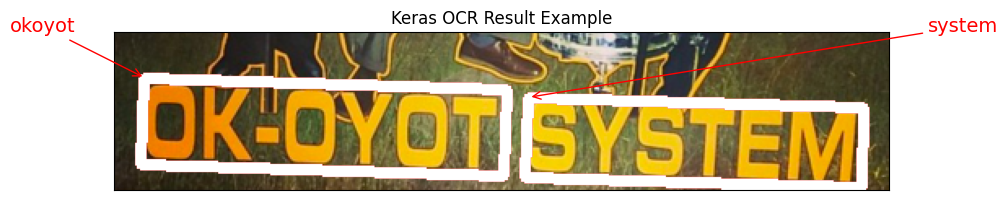

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(image_file_name), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

easyocr vs keras compare

Saving Screenshot 2023-09-06 at 10.37.23.png to Screenshot 2023-09-06 at 10.37.23 (1).png
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


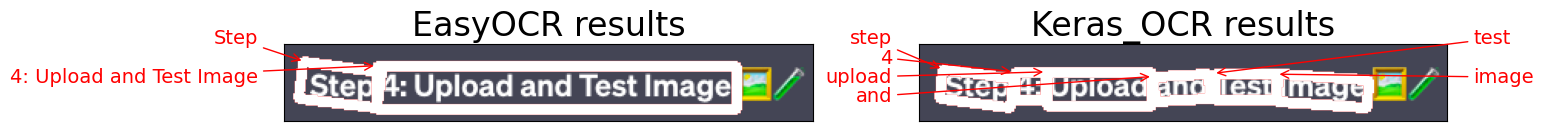

In [ ]:
from google.colab import files
import easyocr
import keras_ocr
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Initialize OCR tools
easyocr_reader = easyocr.Reader(['en'], gpu=True)
keras_ocr_pipeline = keras_ocr.pipeline.Pipeline()

# Run OCR
easyocr_result = easyocr_reader.readtext(image_path)
kerasocr_result = keras_ocr_pipeline.recognize([image_path])[0]

# Plot Comparison
def plot_compare(image_path, easyocr_result, kerasocr_result):
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    # EasyOCR
    easy_results = [(result[1], np.array(result[0])) for result in easyocr_result]
    keras_ocr.tools.drawAnnotations(plt.imread(image_path), easy_results, ax=axs[0])
    axs[0].set_title('EasyOCR results', fontsize=24)

    # Keras OCR
    keras_ocr.tools.drawAnnotations(plt.imread(image_path), kerasocr_result, ax=axs[1])
    axs[1].set_title('Keras_OCR results', fontsize=24)

    plt.show()

# Call function
plot_compare(image_path, easyocr_result, kerasocr_result)

Saving Screenshot 2023-09-06 at 10.43.06.png to Screenshot 2023-09-06 at 10.43.06 (1).png
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


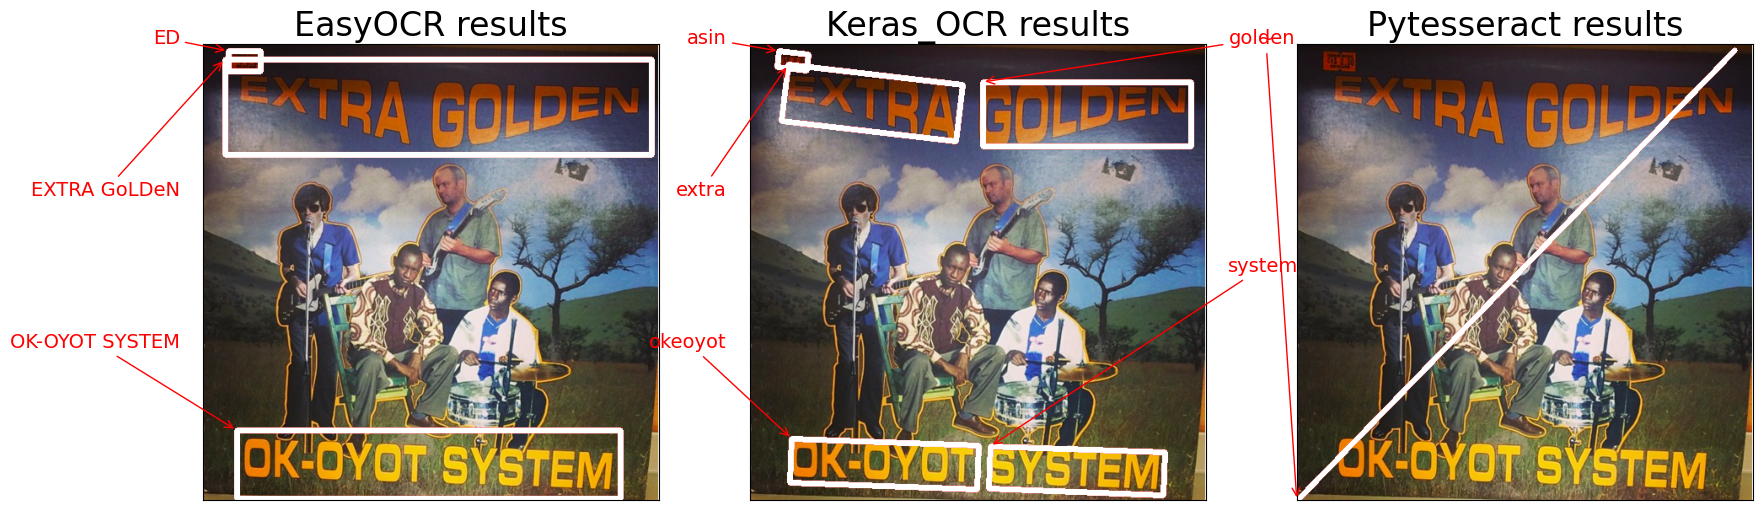

In [ ]:
from google.colab import files
import easyocr
import keras_ocr
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Upload the image 📤
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Initialize OCR tools 🛠️
easyocr_reader = easyocr.Reader(['en'], gpu=True)
keras_ocr_pipeline = keras_ocr.pipeline.Pipeline()

# Step 3: Run OCR 🏃‍♂️
# EasyOCR
easyocr_result = easyocr_reader.readtext(image_path)

# Keras OCR
kerasocr_result = keras_ocr_pipeline.recognize([image_path])[0]

# Pytesseract
image = Image.open(image_path)
text = pytesseract.image_to_string(image)
bounding_boxes = pytesseract.image_to_boxes(image)

# Convert bounding_boxes for Pytesseract
pytesseract_boxes = []
for box in bounding_boxes.splitlines():
    b = box.split()
    coordinates = [[int(b[1]), int(image.size[1] - int(b[2]))], [int(b[3]), int(image.size[1] - int(b[4]))]]
    pytesseract_boxes.append((b[0], np.array(coordinates)))

# Step 4: Plot Comparison 📊
def plot_compare(image_path, easyocr_result, kerasocr_result, pytesseract_boxes):
    fig, axs = plt.subplots(1, 3, figsize=(20, 10))

    # EasyOCR
    easy_results = [(result[1], np.array(result[0])) for result in easyocr_result]
    keras_ocr.tools.drawAnnotations(plt.imread(image_path), easy_results, ax=axs[0])
    axs[0].set_title('EasyOCR results', fontsize=24)

    # Keras OCR
    keras_ocr.tools.drawAnnotations(plt.imread(image_path), kerasocr_result, ax=axs[1])
    axs[1].set_title('Keras_OCR results', fontsize=24)

    # Pytesseract
    keras_ocr.tools.drawAnnotations(plt.imread(image_path), pytesseract_boxes, ax=axs[2])
    axs[2].set_title('Pytesseract results', fontsize=24)

    plt.show()

# Step 5: Call Function 📞
plot_compare(image_path, easyocr_result, kerasocr_result, pytesseract_boxes)